# Titanic Survivor Prediction

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../Datasets/Logistic_Regression/Titanic/train.csv')

In [3]:
data.shape

(891, 12)

In [4]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [7]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
plt.style.use('seaborn')

In [10]:
import seaborn as sns

<AxesSubplot:xlabel='Survived', ylabel='count'>

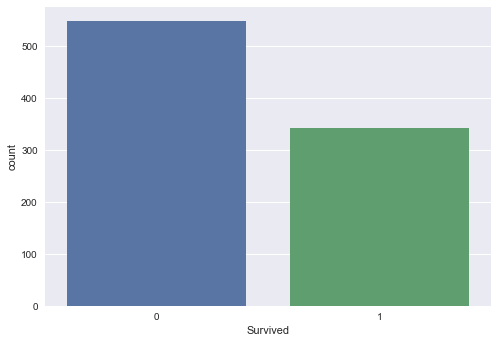

In [14]:
sns.countplot(x='Survived', data=data)

##### More number of lives were lost than who survived

<AxesSubplot:xlabel='Survived', ylabel='count'>

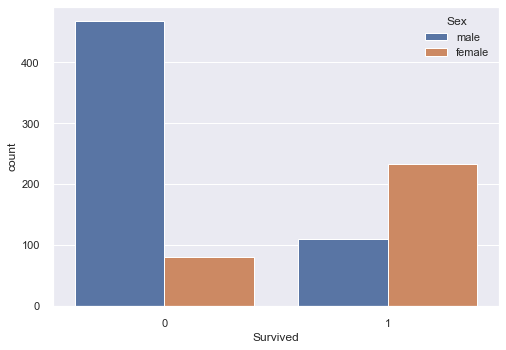

In [16]:
sns.countplot(x='Survived', hue='Sex', data=data)

##### We can conclude that most of the females were saved. The males of the family may have saved their family members first.

<AxesSubplot:xlabel='Survived', ylabel='count'>

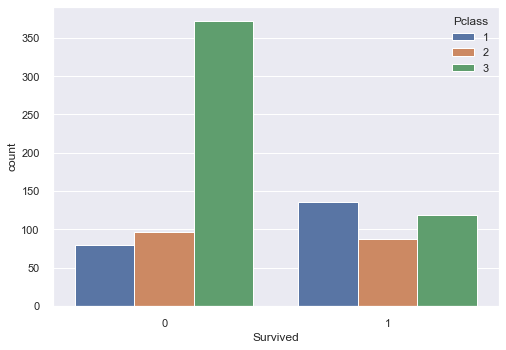

In [18]:
sns.countplot(x='Survived', hue='Pclass', data=data)

##### There were more number of dead people from 3rd passenger class. Majority of the people were saved who were travelling by first class.
##### Most of the people were from 3rd class

<AxesSubplot:xlabel='Survived', ylabel='count'>

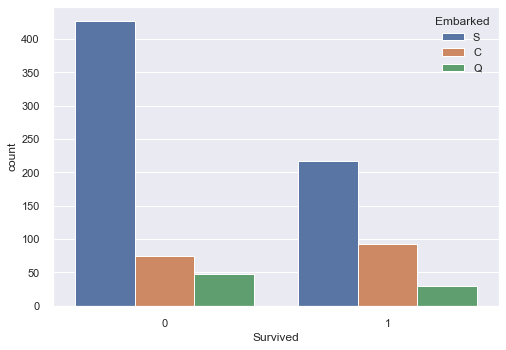

In [19]:
sns.countplot(x='Survived', hue='Embarked', data=data)

<AxesSubplot:ylabel='Frequency'>

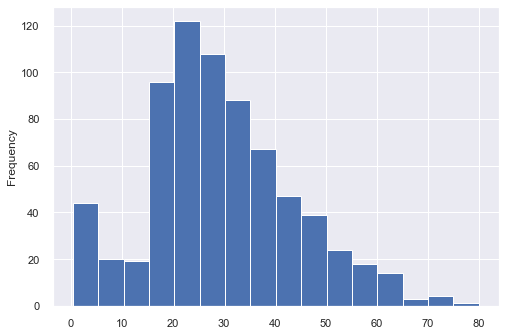

In [24]:
data['Age'].plot.hist(bins=16)

##### Majority of the people on the ship were in the age group 20-50

<AxesSubplot:ylabel='Frequency'>

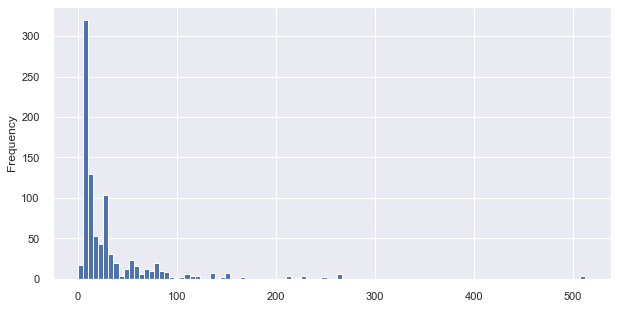

In [30]:
data['Fare'].plot.hist(bins=100, figsize=(10,5))

##### Majority of the fare tickets were in the lower range, that is most of the people were in 3rd passenger class

<AxesSubplot:xlabel='SibSp', ylabel='count'>

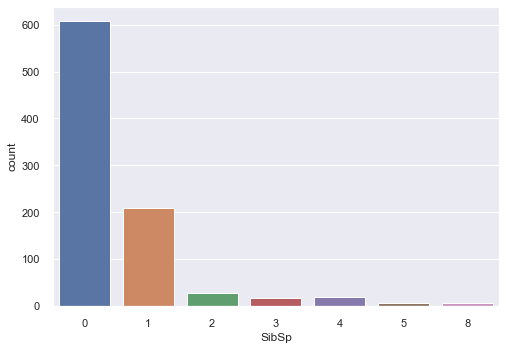

In [31]:
sns.countplot(x='SibSp', data=data)

##### Most of the people are travelling individually

<AxesSubplot:xlabel='Parch', ylabel='count'>

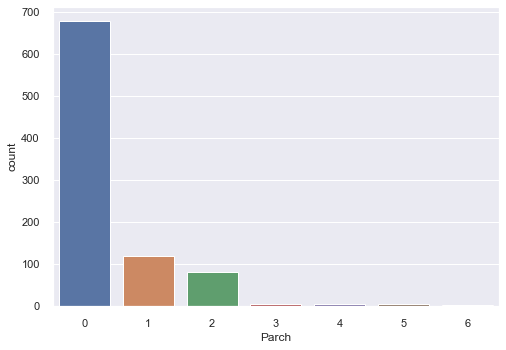

In [32]:
sns.countplot(x='Parch', data=data)

In [33]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

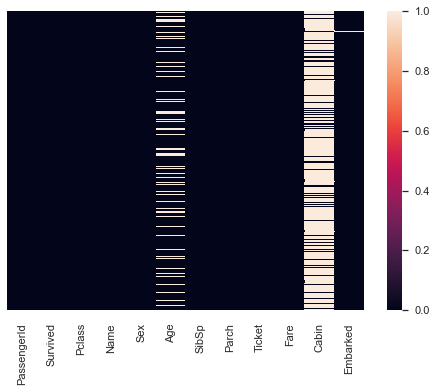

In [34]:
sns.heatmap(data.isnull(), yticklabels=False)

##### Using heatmap can check the missing records
##### Most of the values in Cabin are null and can drop the column

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

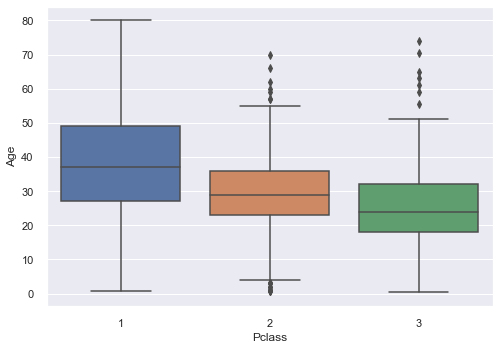

In [35]:
sns.boxplot(x='Pclass', y='Age', data=data)

##### In which class, which age group are travelling, young age people are travelling in class 3
Passenger class is distributed by age

In [38]:
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [39]:
data.drop(['Cabin'], axis=1).head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


In [41]:
data.drop('Cabin', axis=1, inplace=True)

In [42]:
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


In [44]:
data.dropna(inplace=True)       # Drops any rows with null values

In [46]:
data.shape

(712, 11)

<AxesSubplot:>

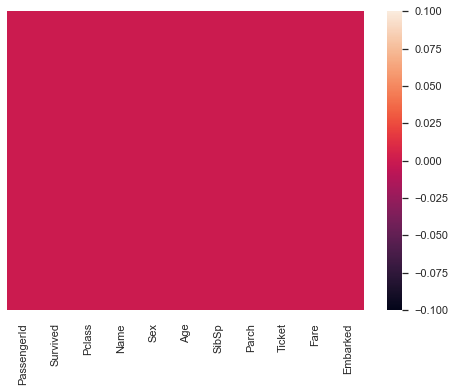

In [51]:
sns.heatmap(data.isnull(), yticklabels=False)

In [52]:
data.isnull().sum()         # Now no missing values

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [54]:
pd.get_dummies(data['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
885,1,0
886,0,1
887,1,0
889,0,1


In [57]:
gender = pd.get_dummies(data['Sex'], drop_first=True)
gender.columns=['Gender']
gender

,Gender
0,1
1,0
2,0
3,0
4,1
...,...
885,0
886,1
887,0
889,1


In [58]:
pd.get_dummies(data['Embarked'])

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
885,0,1,0
886,0,0,1
887,0,0,1
889,1,0,0


In [59]:
embarked = pd.get_dummies(data['Embarked'], drop_first=True)
embarked

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
885,1,0
886,0,1
887,0,1
889,0,0


In [60]:
data.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S


In [61]:
data.drop(['PassengerId', 'Name', 'Sex', 'Ticket', 'Embarked'], axis=1, inplace=True)

In [62]:
data.head(1)

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.25


In [64]:
df = pd.concat([data, embarked, gender], axis=1)

In [65]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Q,S,Gender
0,0,3,22.0,1,0,7.2500,0,1,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,1,0
3,1,1,35.0,1,0,53.1000,0,1,0
4,0,3,35.0,0,0,8.0500,0,1,1
...,...,...,...,...,...,...,...,...,...
885,0,3,39.0,0,5,29.1250,1,0,0
886,0,2,27.0,0,0,13.0000,0,1,1
887,1,1,19.0,0,0,30.0000,0,1,0
889,1,1,26.0,0,0,30.0000,0,0,1


### Training the data

In [68]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [69]:
X

,Pclass,Age,SibSp,Parch,Fare,Q,S,Gender
0,3,22.0,1,0,7.2500,0,1,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,1,0
3,1,35.0,1,0,53.1000,0,1,0
4,3,35.0,0,0,8.0500,0,1,1
...,...,...,...,...,...,...,...,...
885,3,39.0,0,5,29.1250,1,0,0
886,2,27.0,0,0,13.0000,0,1,1
887,1,19.0,0,0,30.0000,0,1,0
889,1,26.0,0,0,30.0000,0,0,1


In [70]:
y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 712, dtype: int64

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [74]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [75]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(569, 8)
(569,)
(143, 8)
(143,)


In [76]:
model = LogisticRegression()

In [77]:
model.fit(X_train, Y_train)

c:\users\mayank\desktop\python\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [78]:
model.coef_

array([[-1.11834744, -0.03971249, -0.3251589 , -0.07852465,  0.00276829,
        -0.41716249, -0.37591361, -2.71015868]])

In [79]:
model.intercept_

array([5.37227958])

In [80]:
model.score(X_train, Y_train)

0.8031634446397188

In [81]:
model.score(X_test, Y_test)

0.7482517482517482

In [90]:
model_1 = LogisticRegression(max_iter=6000)
model_1.fit(X_train, Y_train)
print('Training set accuracy:', model_1.score(X_train, Y_train))
print('Test set accuracy:', model_1.score(X_test, Y_test))

Training set accuracy: 0.8031634446397188
Test set accuracy: 0.7482517482517482


### Normalisation and then training

In [93]:
x_mean = X_train.mean(axis=0)
x_std = X_train.std(axis=0)
print(x_mean.shape)
print(x_std.shape)

(8,)
(8,)


In [94]:
X_train_n = (X_train - x_mean) / x_std
X_train_n.shape

(569, 8)

In [95]:
X_test_n = (X_test - x_mean) / x_std
X_test_n.shape

(143, 8)

In [97]:
model_2 = LogisticRegression(max_iter=2000)
model_2.fit(X_train_n, Y_train)
print('Training set accuracy:', model_2.score(X_train_n, Y_train))
print('Test set accuracy:', model_2.score(X_test_n, Y_test))

Training set accuracy: 0.8084358523725835
Test set accuracy: 0.7412587412587412
